<a href="https://colab.research.google.com/github/MatheusSteinDeAguiar/RegressaoBicicletas/blob/main/regressao_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inicialização

###Importando os dados

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
files.upload()

Saving Bicicletas.csv to Bicicletas (3).csv


{'Bicicletas.csv': b'clima,temperatura,bicicletas_alugadas\n2,0.363625,985\n2,0.35373899999999997,801\n1,0.189405,1349\n1,0.21212199999999998,1562\n1,0.22926999999999997,1600\n1,0.23320900000000003,1606\n2,0.208839,1510\n2,0.162254,959\n1,0.116175,822\n1,0.15088800000000002,1321\n2,0.19146400000000002,1263\n1,0.160473,1162\n1,0.150883,1406\n1,0.188413,1421\n2,0.248112,1248\n1,0.234217,1204\n2,0.176771,1000\n2,0.23233299999999998,683\n2,0.29842199999999997,1650\n2,0.25505,1927\n1,0.157833,1543\n1,0.0790696,981\n1,0.09883910000000001,986\n1,0.11793,1416\n2,0.234526,1985\n3,0.2036,506\n1,0.2197,431\n2,0.22331700000000002,1167\n1,0.212126,1098\n1,0.250322,1096\n2,0.18625,1501\n2,0.23453000000000002,1360\n2,0.254417,1526\n1,0.177878,1550\n2,0.22858699999999998,1708\n2,0.243058,1005\n1,0.291671,1623\n1,0.303658,1712\n1,0.198246,1530\n2,0.144283,1605\n1,0.14954800000000001,1538\n1,0.213509,1746\n1,0.232954,1472\n1,0.324113,1589\n1,0.39835,1913\n1,0.254274,1815\n1,0.3162,2115\n1,0.428658,2475\

In [ ]:
data = pd.read_csv("Bicicletas.csv")

###Analise inicial dos dados

In [ ]:
data.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [ ]:
data.shape

(731, 3)

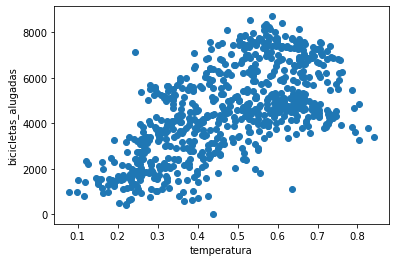

In [ ]:
def grafico_pontos(x, y):
  plt.scatter(data[x], data[y])
  plt.xlabel(x)
  plt.ylabel(y)

grafico_pontos('temperatura', 'bicicletas_alugadas') 

Nota-se que quanto maior a temperatura, maior o númeor de bicicletas alugadas.



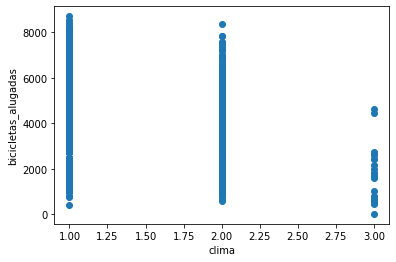

In [ ]:
grafico_pontos('clima', 'bicicletas_alugadas')

Nota-se que para o clima 1 e 2 temos mais bicicletas alugadas que para o clima 3.

###Tratamento inicial dos dados
Normalizando X e y.

In [ ]:
y=data['bicicletas_alugadas'].values
X=data[['clima', 'temperatura']].values

In [ ]:
X = X/np.amax(X,axis=0)
ymax=np.amax(y)
y = y/ymax

##Estrutura da Rede

In [ ]:
def sigmoid(soma):
    return 1/(1+np.exp(-soma))

def relu(soma):
    return np.maximum(0,soma)

In [ ]:
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": "relu"},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": "sigmoid"},
]

###Pesos e Viéses

In [ ]:
def inicia_camadas(arquitetura, seed = 99):
    # Inicia os valores aleatórios
    np.random.seed(seed)
    # Número de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # Inicia armazenamento de parametros
    valores_parametros = {}
    # Itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        indice_camada = indice + 1
        # Extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        # Inicia os valores na matriz de pesos P
        # Inicia os valores na matriz de viés b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

##Propagação

In [ ]:
def propaga_uma_camada(ativado_anterior, pesos_atual, b_atual, ativacao="relu"):
    # Cálculo da entrada para a função de ativação
    saida_atual = np.dot(pesos_atual, ativado_anterior) + b_atual
    # Seleção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
    # Retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(saida_atual), saida_atual

In [ ]:
def propaga_total(X, valores_parametros, arquitetura):
    # Memória temporaria para posterior retropropagacao
    memoria = {}
    # O vetor X é usado como ativação para a camada 0 
    ativado_atual = X
    
    # Iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # A numeração das camadas começa de 1
        indice_camada = indice + 1
        # Utiliza a ativação da iteração anterior
        ativado_anterior = ativado_atual
        # Extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # Extrai os pesos da camada atual
        pesos_atual = valores_parametros["P" + str(indice_camada)]
        # Extrai o viés para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # Calcula a ativação para a camada atual
        ativado_atual, saida_atual = propaga_uma_camada(ativado_anterior, pesos_atual, b_atual, func_ativacao_atual)
        # Salva os valores calculados na memória
        memoria["A" + str(indice)] = ativado_anterior
        memoria["Z" + str(indice_camada)] = saida_atual
       
    # Retorna o vetor predito e um dicionário contendo os valores intermediários
    return ativado_atual, memoria

##Testando a rede

In [ ]:
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

###Comparação entre o estimado e o real

In [ ]:
y_estimado[0,0]*ymax

4579.982967258466

In [ ]:
y[0]*ymax

985.0000000000001

Podemos observar que o modelo errou muito.

In [ ]:
def valor_de_custo(y_predito, y_real):
  # Extrai do y o número de exemplos passado para a rede
  m = y_predito.shape[1]
  # A função de custo
  custo = -1/m * (np.dot(y_real, np.log(y_predito).T)+np.dot(1-y_real, np.log(1-y_predito).T))
  # Retorna o escalar do custo
  return np.squeeze(custo)

##Atualização dos pesos

In [ ]:
def atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem):
  # Iterações pelas camadas
  for indice_camada, camada in enumerate(arquitetura, 1):
    valores_parametros['P' + str(indice_camada)] -= taxa_aprendizagem*gradientes["dP" + str(indice_camada)]
    valores_parametros['b' + str(indice_camada)] -= taxa_aprendizagem*gradientes["db" + str(indice_camada)]
  return valores_parametros

##Retropropagação

In [ ]:
def retropropaga_total (y_predito, y_real, memoria, valores_parametros, arquitetura):
  # Definindo gradientes, inicialmente vazio
  gradientes = {}
  # Garantir que o y predito e o original tenham o mesmo formato
  y_real = y_real.reshape(y_predito.shape)
  # Inicialização da derivada da função de custo
  d_ativado_anterior = - (np.divide(y_real, y_predito) - np.divide(1-y_real, 1-y_predito))
  # Retropropagação, percorrendo a rede no sentido contrário
  for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
      # A numeração das camadas começa de 1
      indice_camada_atual = indice_camada_anterior + 1
      # Extrai a função de ativação para a camada atual
      func_ativacao_atual = camada["ativacao"]
      d_ativado_atual = d_ativado_anterior
      # Recupera o resultado da ativação em determinada camada
      ativado_anterior = memoria["A"+ str(indice_camada_anterior)]
      # Recupera a saida atual
      saida_atual = memoria["Z" + str(indice_camada_atual)]
      # Recupera pesos
      pesos_atual = valores_parametros['P' + str(indice_camada_atual)]
      # Recupera viéses
      b_atula = valores_parametros['b' + str(indice_camada_atual)]
      # Pega os dados da retropropagação em cada camada
      d_ativado_anterior, d_pesos_atual, d_b_atual = retropropaga_uma_camada(d_ativado_atual, pesos_atual, b_atual, saida_atual, ativado_anterior, funcao_ativacao_atual)
      # Grava a informação dos pesos e viéses dos gradientes
      gradientes["dP" + str(indice_camada_atual)] = d_pesos_atual
      gradientes["db" + str(indice_camada_atual)] = d_b_atual
      # Retorna os gradientes
  return gradientes

In [ ]:
def sigmoid_retro(d_ativado, saida):
    sig = sigmoid(saida)
    return d_ativado * sig * (1 - sig)

def relu_retro(d_ativado, saida):
    d_saida = np.array(d_ativado, copy = True)
    d_saida[saida <= 0] = 0;
    return d_saida;

In [ ]:
def retropropagacao_uma_camada(d_ativado_atual, pesos_atual, b_atual, saida_atual, ativado_anterior, ativacao="relu"):
    # número de exemplos
    m = ativado_anterior.shape[1]
    
    # seleção função de ativação
    if ativacao is "relu":
        func_ativacao_retro = relu_retro
    elif ativacao is "sigmoid":
        func_ativacao_retro = sigmoid_retro
    else:
        raise Exception('Ainda não implementamos essa funcao')
    
    # derivada da função de ativação
    d_saida_atual = func_ativacao_retro(d_ativado_atual, saida_atual)
    
    # derivada da matriz de Pesos
    d_pesos_atual = np.dot(d_saida_atual, ativado_anterior.T) / m
    # derivada do vetor b
    d_b_atual = np.sum(d_saida_atual, axis=1, keepdims=True) / m
    # derivada da matriz A_anterior
    d_ativado_anterior = np.dot(pesos_atual.T, d_saida_atual)

    return d_ativado_anterior, d_pesos_atual, d_b_atual

In [ ]:
def treino(X, y_real,X_teste,y_teste, arquitetura, epocas, taxa_aprendizagem):
    # Inicia os parâmetros da rede neural
    valores_parametros = inicia_camadas(arquitetura, 2)
    # Listas que vão guardar o progresso da aprendizagem da rede 
    historia_custo = []
    historia_custo_teste = []
   
    
    # Atualiza a cada época
    for i in range(epocas):
        # Propaga a rede
        y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)
        
        y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, 
                                                  arquitetura)
        
        # Calcula as métricas e salva nas listas de história
        custo = valor_de_custo(y_predito, y_real)
        historia_custo.append(custo)
        custo_teste = valor_de_custo(y_predito_teste, y_teste)
        historia_custo_teste.append(custo_teste)
        
        
        # Faz a retropropagação
        gradientes = retropropagacao_total(y_predito, y_real, memoria, 
                                           valores_parametros, arquitetura)
        # Atualiza os pesos
        valores_parametros = atualiza(valores_parametros, gradientes, 
                                      arquitetura, taxa_aprendizagem)
        
        if(i % 50 == 0):
            
            print("Iteração: {:05} - custo: {:.5f} ".format(i, custo))
            
            
    return valores_parametros, historia_custo, historia_custo_teste

#Treino da rede

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.43, random_state=42)

In [ ]:
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape((y_treino.shape[0], 1))), 
                                                                  np.transpose(X_teste), np.transpose(y_teste.reshape((y_teste.shape[0], 1))), 
                                                                  arquitetura, 20000, 0.01)

###Gráfico de Custo por Época

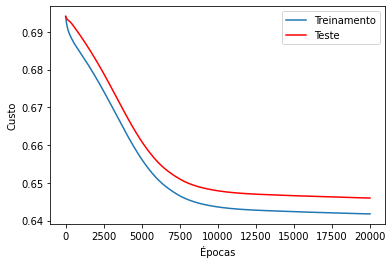

In [ ]:
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento','Teste'])
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.show()

Conforme podemos observar como há semelhançã entre o custo de terte e treino, não temos a situação de overfit.

#Previsão

In [ ]:
# Previsão
y_pred, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

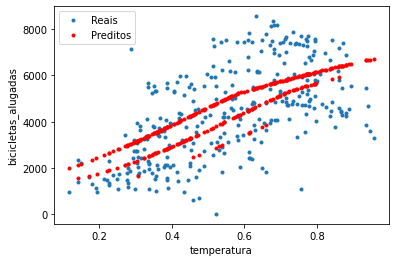

In [ ]:
plt.plot(np.transpose(X_teste)[1],ymax*y_teste,'.')
plt.plot(np.transpose(X_teste)[1],ymax*y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')
plt.show()

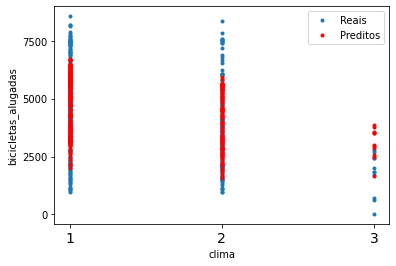

In [ ]:
plt.plot(3*np.transpose(X_teste)[0],ymax*y_teste,'.')
plt.plot(3*np.transpose(X_teste)[0],ymax*y_pred.reshape([-1,1]),'.r')
plt.legend(['Reais','Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()

Pode-se observar que em média a rede conseguiu prever satisfatóriamente o número de biscicletas alugadas de acordo com cloima e temperatura.

